Step 01 to Step 03

CELL 01

In [ ]:
# # Cell 1: Generate Synthetic Textile Dataset

# import numpy as np
# import cv2
# import os
# from pathlib import Path
# import random
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# print("🎨 Generating Synthetic Textile Dataset.. .\n")

# # Configuration
# DATASET_CONFIG = {
#     'img_size': 224,
#     'num_train': 300,      # 300 images per class for training
#     'num_val':  60,         # 60 images per class for validation
#     'num_test':  40,        # 40 images per class for testing
# }

# # Create directory structure
# def create_directories():
#     """Create dataset folder structure"""
#     base_dir = 'dataset'
#     splits = ['train', 'validation', 'test']
#     classes = ['defect', 'no_defect']

#     for split in splits:
#         for cls in classes:
#             path = os.path.join(base_dir, split, cls)
#             os.makedirs(path, exist_ok=True)

#     return base_dir

# # Generate fabric texture
# def generate_fabric_texture(size=224):
#     """Generate realistic fabric-like texture"""

#     # Base fabric colors (various fabric types)
#     fabric_colors = [
#         (220, 220, 230),  # Light gray (cotton)
#         (200, 210, 220),  # Blue-ish (denim)
#         (240, 235, 215),  # Beige (linen)
#         (190, 180, 170),  # Brown (wool)
#         (255, 250, 240),  # Cream (silk)
#         (210, 200, 190),  # Tan
#     ]

#     # Random fabric color
#     base_color = random.choice(fabric_colors)

#     # Create base image
#     img = np.ones((size, size, 3), dtype=np.uint8)
#     img[:, :] = base_color

#     # Add fabric weave pattern
#     for i in range(0, size, 4):
#         cv2.line(img, (i, 0), (i, size),
#                 (base_color[0]-10, base_color[1]-10, base_color[2]-10), 1)
#     for j in range(0, size, 4):
#         cv2.line(img, (0, j), (size, j),
#                 (base_color[0]-10, base_color[1]-10, base_color[2]-10), 1)

#     # Add texture noise
#     noise = np.random. normal(0, 8, (size, size, 3))
#     img = np.clip(img + noise, 0, 255).astype(np.uint8)

#     # Add slight variations
#     img = cv2.GaussianBlur(img, (3, 3), 0.5)

#     return img

# # Add defects to fabric
# def add_defect(img, defect_type='random'):
#     """Add various types of defects to fabric image"""

#     img_with_defect = img.copy()
#     size = img.shape[0]

#     if defect_type == 'random':
#         defect_type = random.choice(['stain', 'hole', 'scratch', 'tear', 'thread'])

#     if defect_type == 'stain':
#         # Circular stain
#         num_stains = random.randint(1, 3)
#         for _ in range(num_stains):
#             center = (random.randint(30, size-30), random.randint(30, size-30))
#             radius = random. randint(10, 30)
#             stain_color = (
#                 random.randint(50, 150),
#                 random.randint(50, 150),
#                 random.randint(50, 150)
#             )
#             cv2.circle(img_with_defect, center, radius, stain_color, -1)
#             # Blur the stain edges
#             mask = np.zeros_like(img_with_defect)
#             cv2.circle(mask, center, radius, (255, 255, 255), -1)
#             img_with_defect = cv2.GaussianBlur(img_with_defect, (15, 15), 0)
#             img_with_defect = np.where(mask > 0, img_with_defect, img)

#     elif defect_type == 'hole':
#         # Dark hole/tear
#         num_holes = random.randint(1, 2)
#         for _ in range(num_holes):
#             center = (random.randint(40, size-40), random.randint(40, size-40))
#             radius = random.randint(8, 20)
#             cv2.circle(img_with_defect, center, radius, (30, 30, 30), -1)
#             # Add irregular edges
#             for _ in range(5):
#                 angle = random.uniform(0, 2*np.pi)
#                 offset_x = int(radius * 0.7 * np.cos(angle))
#                 offset_y = int(radius * 0.7 * np.sin(angle))
#                 cv2.circle(img_with_defect,
#                           (center[0] + offset_x, center[1] + offset_y),
#                           random.randint(3, 8), (30, 30, 30), -1)

#     elif defect_type == 'scratch':
#         # Linear scratch
#         num_scratches = random.randint(1, 3)
#         for _ in range(num_scratches):
#             pt1 = (random.randint(0, size), random.randint(0, size))
#             pt2 = (random.randint(0, size), random.randint(0, size))
#             thickness = random.randint(1, 3)
#             scratch_color = (
#                 random. randint(80, 180),
#                 random.randint(80, 180),
#                 random.randint(80, 180)
#             )
#             cv2.line(img_with_defect, pt1, pt2, scratch_color, thickness)

#     elif defect_type == 'tear':
#         # Irregular tear
#         pt1 = (random.randint(20, size-20), random.randint(20, size-20))
#         for _ in range(random.randint(3, 6)):
#             pt2 = (pt1[0] + random.randint(-30, 30),
#                    pt1[1] + random.randint(-30, 30))
#             cv2.line(img_with_defect, pt1, pt2, (40, 40, 40), 2)
#             pt1 = pt2

#     elif defect_type == 'thread':
#         # Loose thread or pull
#         num_threads = random. randint(2, 5)
#         start_pt = (random.randint(50, size-50), random.randint(50, size-50))
#         for _ in range(num_threads):
#             end_pt = (start_pt[0] + random.randint(-40, 40),
#                      start_pt[1] + random.randint(-40, 40))
#             thread_color = (
#                 random. randint(100, 200),
#                 random.randint(100, 200),
#                 random.randint(100, 200)
#             )
#             cv2.line(img_with_defect, start_pt, end_pt, thread_color, 1)

#     return img_with_defect

# # Generate dataset
# def generate_dataset(config):
#     """Generate complete dataset with defect and no_defect images"""

#     base_dir = create_directories()
#     img_size = config['img_size']

#     splits = {
#         'train': config['num_train'],
#         'validation':  config['num_val'],
#         'test': config['num_test']
#     }

#     for split, num_images in splits. items():
#         print(f"\n📁 Generating {split} set...")

#         # Generate NO_DEFECT images
#         print(f"   Creating {num_images} NO_DEFECT images...")
#         for i in tqdm(range(num_images), desc="   No Defect"):
#             img = generate_fabric_texture(img_size)
#             save_path = os.path.join(base_dir, split, 'no_defect', f'no_defect_{i:04d}.png')
#             cv2.imwrite(save_path, img)

#         # Generate DEFECT images
#         print(f"   Creating {num_images} DEFECT images...")
#         defect_types = ['stain', 'hole', 'scratch', 'tear', 'thread']
#         for i in tqdm(range(num_images), desc="   Defect"):
#             img = generate_fabric_texture(img_size)
#             defect_type = random.choice(defect_types)
#             img_with_defect = add_defect(img, defect_type)
#             save_path = os.path.join(base_dir, split, 'defect', f'defect_{defect_type}_{i:04d}.png')
#             cv2.imwrite(save_path, img_with_defect)

#     return base_dir

# # Generate the dataset
# dataset_path = generate_dataset(DATASET_CONFIG)

# # Display summary
# print("\n" + "="*60)
# print("✅ DATASET GENERATION COMPLETE!")
# print("="*60)
# print(f"\n📊 Dataset Summary:")
# print(f"   Location: {dataset_path}/")
# print(f"\n   Training Set:")
# print(f"     - Defect:      {DATASET_CONFIG['num_train']} images")
# print(f"     - No Defect:   {DATASET_CONFIG['num_train']} images")
# print(f"\n   Validation Set:")
# print(f"     - Defect:     {DATASET_CONFIG['num_val']} images")
# print(f"     - No Defect:  {DATASET_CONFIG['num_val']} images")
# print(f"\n   Test Set:")
# print(f"     - Defect:     {DATASET_CONFIG['num_test']} images")
# print(f"     - No Defect:   {DATASET_CONFIG['num_test']} images")
# print(f"\n   Total Images: {(DATASET_CONFIG['num_train'] + DATASET_CONFIG['num_val'] + DATASET_CONFIG['num_test']) * 2}")
# print("="*60)

# # Verify directory structure
# print("\n📂 Directory Structure:")
# os.system('tree dataset -L 2 || find dataset -maxdepth 2 -type d')

🎨 Generating Synthetic Textile Dataset.. .


📁 Generating train set...
   Creating 300 NO_DEFECT images...


   No Defect: 100%|██████████| 300/300 [00:05<00:00, 52.46it/s]


   Creating 300 DEFECT images...


   Defect: 100%|██████████| 300/300 [00:04<00:00, 61.17it/s] 



📁 Generating validation set...
   Creating 60 NO_DEFECT images...


   No Defect: 100%|██████████| 60/60 [00:00<00:00, 114.90it/s]


   Creating 60 DEFECT images...


   Defect: 100%|██████████| 60/60 [00:00<00:00, 107.80it/s]



📁 Generating test set...
   Creating 40 NO_DEFECT images...


   No Defect: 100%|██████████| 40/40 [00:00<00:00, 88.09it/s]


   Creating 40 DEFECT images...


   Defect: 100%|██████████| 40/40 [00:00<00:00, 70.91it/s]


✅ DATASET GENERATION COMPLETE!

📊 Dataset Summary:
   Location: dataset/

   Training Set:
     - Defect:      300 images
     - No Defect:   300 images

   Validation Set:
     - Defect:     60 images
     - No Defect:  60 images

   Test Set:
     - Defect:     40 images
     - No Defect:   40 images

   Total Images: 800

📂 Directory Structure:


0

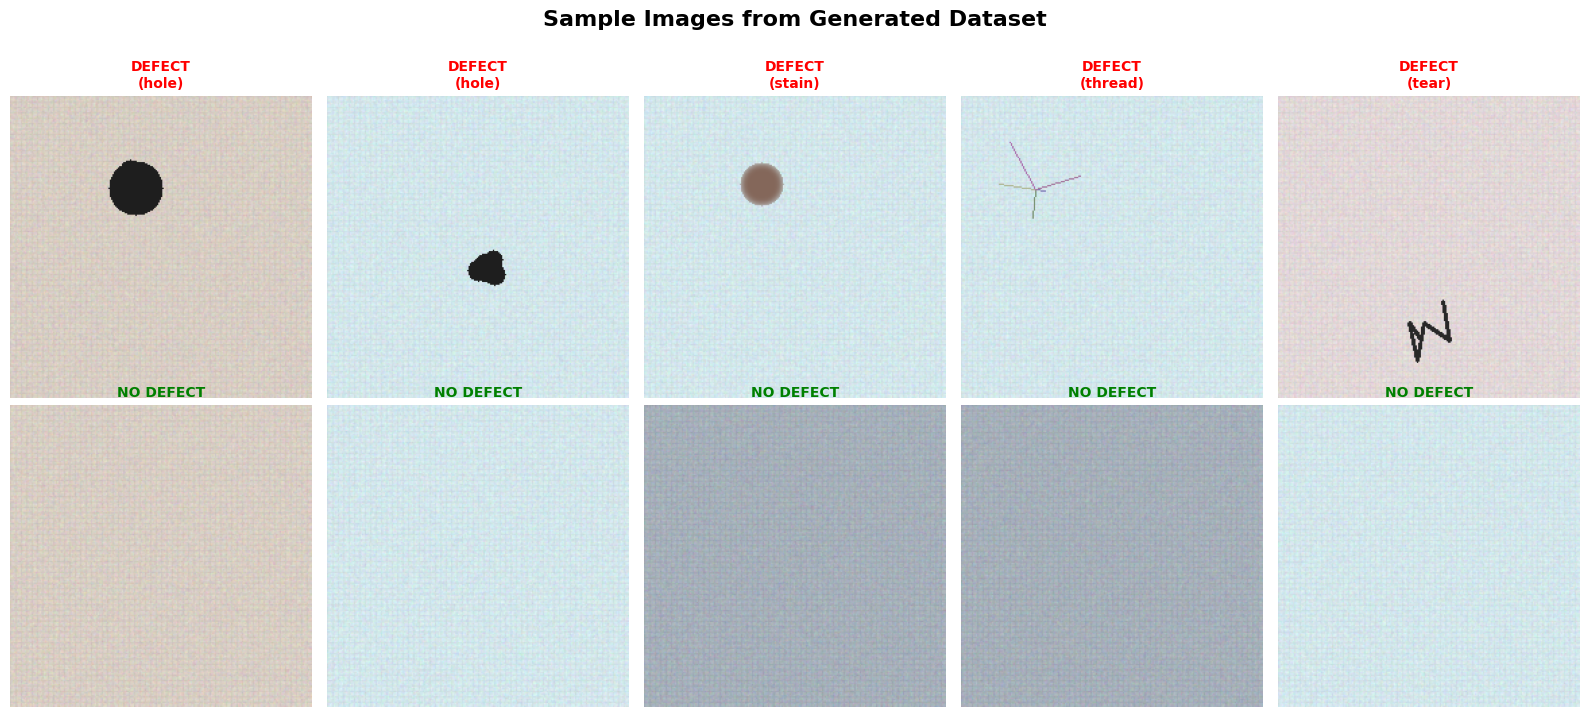

In [ ]:
# # Cell 2: Display Sample Images from Generated Dataset

# import matplotlib.pyplot as plt
# import cv2
# import os
# import random

# def show_dataset_samples(dataset_path, samples_per_class=5):
#     """Display sample images from the generated dataset"""

#     # Get sample images
#     defect_dir = os.path.join(dataset_path, 'train', 'defect')
#     no_defect_dir = os.path.join(dataset_path, 'train', 'no_defect')

#     defect_images = random.sample(os.listdir(defect_dir), samples_per_class)
#     no_defect_images = random.sample(os.listdir(no_defect_dir), samples_per_class)

#     fig, axes = plt.subplots(2, samples_per_class, figsize=(16, 7))

#     # Display DEFECT images
#     for i, img_name in enumerate(defect_images):
#         img_path = os.path.join(defect_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         axes[0, i].imshow(img)
#         axes[0, i].set_title(f'DEFECT\n({img_name. split("_")[1]})',
#                             color='red', fontweight='bold', fontsize=10)
#         axes[0, i].axis('off')

#     # Display NO_DEFECT images
#     for i, img_name in enumerate(no_defect_images):
#         img_path = os.path.join(no_defect_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         axes[1, i].imshow(img)
#         axes[1, i]. set_title('NO DEFECT',
#                             color='green', fontweight='bold', fontsize=10)
#         axes[1, i].axis('off')

#     plt.suptitle('Sample Images from Generated Dataset',
#                  fontsize=16, fontweight='bold', y=1.02)
#     plt.tight_layout()
#     plt.savefig('dataset_samples.png', dpi=150, bbox_inches='tight')
#     plt.show()

# # Display samples
# show_dataset_samples('dataset', samples_per_class=5)

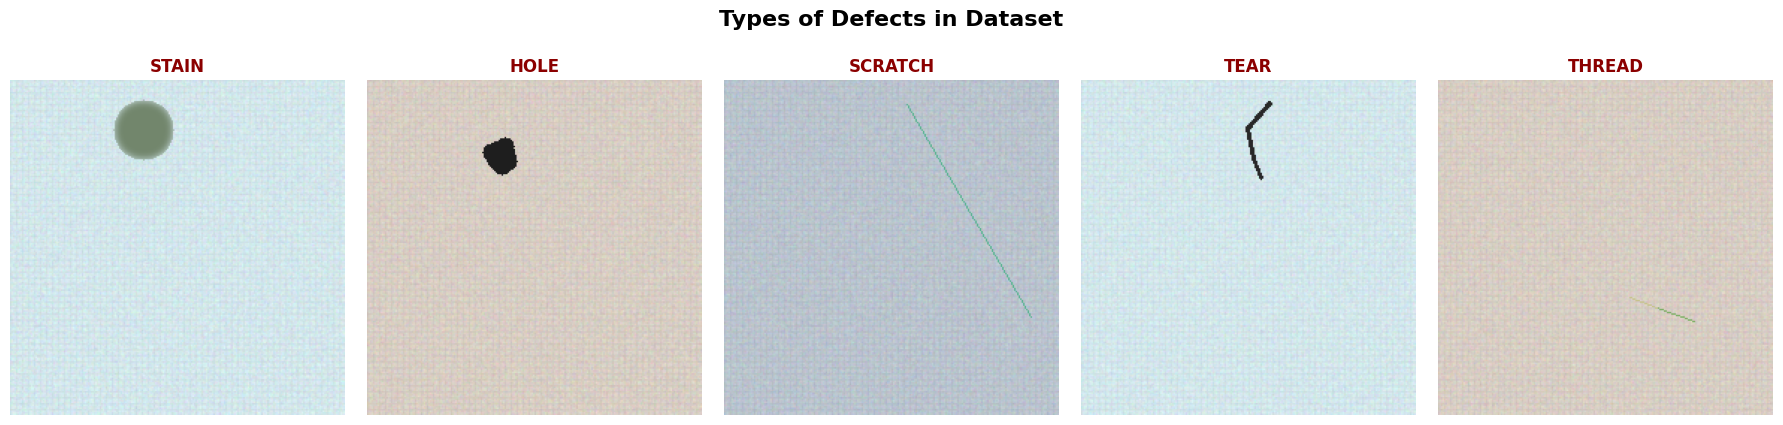


📋 Defect Type Descriptions:
1. STAIN:     Circular discoloration (oil, dirt, chemicals)
2. HOLE:     Dark circular/irregular holes or burns
3. SCRATCH:  Linear marks across fabric surface
4. TEAR:     Irregular rips or tears in fabric
5. THREAD:   Loose threads or fabric pulls


In [ ]:
# # Cell 3: Show All Defect Types

# import matplotlib.pyplot as plt
# import cv2
# import os

# def show_all_defect_types(dataset_path):
#     """Display one example of each defect type"""

#     defect_types = ['stain', 'hole', 'scratch', 'tear', 'thread']
#     defect_dir = os.path.join(dataset_path, 'train', 'defect')

#     fig, axes = plt.subplots(1, 5, figsize=(18, 4))

#     for i, defect_type in enumerate(defect_types):
#         # Find image with this defect type
#         for img_name in os.listdir(defect_dir):
#             if defect_type in img_name:
#                 img_path = os.path.join(defect_dir, img_name)
#                 img = cv2.imread(img_path)
#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#                 axes[i].imshow(img)
#                 axes[i].set_title(f'{defect_type. upper()}',
#                                  fontweight='bold', fontsize=12, color='darkred')
#                 axes[i].axis('off')
#                 break

#     plt.suptitle('Types of Defects in Dataset',
#                  fontsize=16, fontweight='bold', y=1.05)
#     plt.tight_layout()
#     plt.savefig('defect_types.png', dpi=150, bbox_inches='tight')
#     plt.show()

#     # Print descriptions
#     print("\n📋 Defect Type Descriptions:")
#     print("="*60)
#     print("1. STAIN:     Circular discoloration (oil, dirt, chemicals)")
#     print("2. HOLE:     Dark circular/irregular holes or burns")
#     print("3. SCRATCH:  Linear marks across fabric surface")
#     print("4. TEAR:     Irregular rips or tears in fabric")
#     print("5. THREAD:   Loose threads or fabric pulls")
#     print("="*60)

# show_all_defect_types('dataset')

In [ ]:
# # Cell 4: Save Generated Dataset to Google Drive

# from google. colab import drive
# import shutil
# import os

# # Mount Google Drive
# drive.mount('/content/drive')

# # Create folder in Drive
# drive_dataset_path = '/content/drive/MyDrive/TextileAI_Dataset'

# print(f"📦 Copying dataset to Google Drive...")
# print(f"   Destination: {drive_dataset_path}")

# # Copy entire dataset folder
# if os.path.exists(drive_dataset_path):
#     print("⚠️  Dataset already exists in Drive.  Removing old version...")
#     shutil.rmtree(drive_dataset_path)

# shutil.copytree('dataset', drive_dataset_path)

# print("✅ Dataset successfully saved to Google Drive!")
# print(f"\n📍 Location: {drive_dataset_path}")
# print("\nℹ️  You can now use this dataset in future Colab sessions by loading from Drive!")

Mounted at /content/drive
📦 Copying dataset to Google Drive...
   Destination: /content/drive/MyDrive/TextileAI_Dataset
⚠️  Dataset already exists in Drive.  Removing old version...
✅ Dataset successfully saved to Google Drive!

📍 Location: /content/drive/MyDrive/TextileAI_Dataset

ℹ️  You can now use this dataset in future Colab sessions by loading from Drive!


In [1]:
import numpy as np
import cv2
import os
from pathlib import Path
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import cv2
import os
import random

import matplotlib.pyplot as plt
import cv2
import os

from google. colab import drive
import shutil
import os

In [4]:
# Cell 5: Load Dataset from Google Drive (Use this in future sessions)

from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to dataset in Drive
drive_dataset_path = '/content/drive/MyDrive/Dataset'

# Copy from Drive to Colab
if os.path. exists(drive_dataset_path):
    print("📥 Loading dataset from Google Drive...")

    # Remove existing dataset in Colab (if any)
    if os.path.exists('dataset'):
        shutil.rmtree('dataset')

    # Copy from Drive
    shutil.copytree(drive_dataset_path, 'dataset')

    print("✅ Dataset loaded successfully!")

    # Display summary
    train_defect = len(os.listdir('dataset/train/defect'))
    train_no_defect = len(os.listdir('dataset/train/no_defect'))
    val_defect = len(os.listdir('dataset/validation/defect'))
    val_no_defect = len(os.listdir('dataset/validation/no_defect'))
    test_defect = len(os. listdir('dataset/test/defect'))
    test_no_defect = len(os.listdir('dataset/test/no_defect'))

    print(f"\n📊 Loaded Dataset Summary:")
    print(f"   Train:       {train_defect + train_no_defect} images")
    print(f"   Validation: {val_defect + val_no_defect} images")
    print(f"   Test:       {test_defect + test_no_defect} images")
    print(f"   Total:      {train_defect + train_no_defect + val_defect + val_no_defect + test_defect + test_no_defect} images")
else:
    print("❌ Dataset not found in Google Drive!")
    print(f"   Expected location: {drive_dataset_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📥 Loading dataset from Google Drive...
✅ Dataset loaded successfully!

📊 Loaded Dataset Summary:
   Train:       172 images
   Validation: 36 images
   Test:       39 images
   Total:      247 images


In [5]:
# Cell 6: Detailed Dataset Statistics (FIXED)

import os
import cv2
import numpy as np
from collections import Counter

def analyze_dataset(dataset_path):
    """Analyze and display dataset statistics"""

    splits = ['train', 'validation', 'test']
    classes = ['defect', 'no_defect']

    print("="*70)
    print("📊 DETAILED DATASET STATISTICS")
    print("="*70)

    total_images = 0

    for split in splits:
        print(f"\n{split. upper()}:")
        print("-" * 70)

        for cls in classes:
            path = os.path.join(dataset_path, split, cls)
            images = os.listdir(path)
            num_images = len(images)
            total_images += num_images

            # Get image dimensions
            sample_img = cv2.imread(os.path.join(path, images[0]))
            height, width, channels = sample_img. shape

            # FIXED:  Removed space in format specifier
            print(f"  {cls:12s}: {num_images:4d} images | Size: {width}x{height}x{channels}")

            # For defect images, count types
            if cls == 'defect':
                defect_types = [img. split('_')[1] for img in images]
                type_counts = Counter(defect_types)
                print(f"                Defect breakdown: {dict(type_counts)}")

    print("\n" + "="*70)
    print(f"TOTAL IMAGES: {total_images}")
    print("="*70)

    # Calculate split ratios
    train_count = len(os.listdir(os. path.join(dataset_path, 'train', 'defect'))) + \
                  len(os.listdir(os.path.join(dataset_path, 'train', 'no_defect')))
    val_count = len(os.listdir(os.path.join(dataset_path, 'validation', 'defect'))) + \
                len(os.listdir(os.path. join(dataset_path, 'validation', 'no_defect')))
    test_count = len(os.listdir(os.path.join(dataset_path, 'test', 'defect'))) + \
                 len(os.listdir(os.path.join(dataset_path, 'test', 'no_defect')))

    print(f"\n📈 Split Ratios:")
    print(f"   Train:        {train_count/total_images*100:.1f}%")
    print(f"   Validation:   {val_count/total_images*100:.1f}%")
    print(f"   Test:        {test_count/total_images*100:.1f}%")
    print("="*70)

# Run analysis
analyze_dataset('dataset')

📊 DETAILED DATASET STATISTICS

TRAIN:
----------------------------------------------------------------------
  defect      :   74 images | Size: 4096x256x3
                Defect breakdown: {'002': 5, '006': 6, '019': 30, '023': 4, '022': 7, '025': 4, '027': 1, '030': 10, '010': 3, '016': 2, '029': 1, '036': 1}
  no_defect   :   98 images | Size: 4096x256x3

VALIDATION:
----------------------------------------------------------------------
  defect      :   15 images | Size: 4096x256x3
                Defect breakdown: {'019': 4, '023': 1, '030': 3, '010': 4, '022': 1, '025': 1, '006': 1}
  no_defect   :   21 images | Size: 4096x256x3

TEST:
----------------------------------------------------------------------
  defect      :   17 images | Size: 4096x256x3
                Defect breakdown: {'019': 5, '030': 1, '002': 4, '022': 1, '010': 3, '016': 1, '006': 1, '025': 1}
  no_defect   :   22 images | Size: 4096x256x3

TOTAL IMAGES: 247

📈 Split Ratios:
   Train:        69.6%
   Validati

Step 04

CELL 02

In [6]:
# Cell 2: Organize Dataset into Proper Structure

import os
import shutil
from pathlib import Path

# Create directory structure
def create_dataset_structure():
    """
    Creates the required folder structure:
    dataset/
      ├── train/
      │   ├── defect/
      │   └── no_defect/
      ├── validation/
      │   ├── defect/
      │   └── no_defect/
      └── test/
          ├── defect/
          └── no_defect/
    """

    base_dir = 'dataset'
    categories = ['defect', 'no_defect']
    splits = ['train', 'validation', 'test']

    for split in splits:
        for category in categories:
            path = os.path.join(base_dir, split, category)
            os.makedirs(path, exist_ok=True)

    print("✅ Folder structure created!")
    return base_dir

base_dir = create_dataset_structure()

# Display structure
! tree dataset -L 2 || find dataset -maxdepth 2 -type d

✅ Folder structure created!
/bin/bash: line 1: tree: command not found
dataset
dataset/train
dataset/train/defect
dataset/train/no_defect
dataset/validation
dataset/validation/defect
dataset/validation/no_defect
dataset/test
dataset/test/defect
dataset/test/no_defect


STEP 05, Cell 03


In [7]:
# Cell 3: Split Dataset into Train/Val/Test

import os
import shutil
import random
from pathlib import Path

def split_dataset(source_defect_folder, source_no_defect_folder,
                  train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Split images into train/validation/test sets
    """

    random.seed(42)

    def copy_files(file_list, destination):
        for file in file_list:
            shutil.copy(file, destination)

    # Process defect images
    defect_images = list(Path(source_defect_folder).glob('*.*'))
    random.shuffle(defect_images)

    total_defect = len(defect_images)
    train_split = int(total_defect * train_ratio)
    val_split = int(total_defect * (train_ratio + val_ratio))

    train_defect = defect_images[:train_split]
    val_defect = defect_images[train_split:val_split]
    test_defect = defect_images[val_split:]

    copy_files(train_defect, 'dataset/train/defect/')
    copy_files(val_defect, 'dataset/validation/defect/')
    copy_files(test_defect, 'dataset/test/defect/')

    # Process no_defect images
    no_defect_images = list(Path(source_no_defect_folder).glob('*.*'))
    random.shuffle(no_defect_images)

    total_no_defect = len(no_defect_images)
    train_split = int(total_no_defect * train_ratio)
    val_split = int(total_no_defect * (train_ratio + val_ratio))

    train_no_defect = no_defect_images[:train_split]
    val_no_defect = no_defect_images[train_split:val_split]
    test_no_defect = no_defect_images[val_split:]

    copy_files(train_no_defect, 'dataset/train/no_defect/')
    copy_files(val_no_defect, 'dataset/validation/no_defect/')
    copy_files(test_no_defect, 'dataset/test/no_defect/')

    print(f"📊 Dataset Split Summary:")
    print(f"   DEFECT images:")
    print(f"     - Train:       {len(train_defect)}")
    print(f"     - Validation: {len(val_defect)}")
    print(f"     - Test:       {len(test_defect)}")
    print(f"   NO_DEFECT images:")
    print(f"     - Train:      {len(train_no_defect)}")
    print(f"     - Validation:  {len(val_no_defect)}")
    print(f"     - Test:       {len(test_no_defect)}")
    print(f"   TOTAL:  {total_defect + total_no_defect} images")

# ⚠️ CHANGE THESE PATHS to match your downloaded dataset
source_defect = 'fabric_data/defect'  # Path to defect images
source_no_defect = 'fabric_data/no_defect'  # Path to no_defect images

# Run the split
split_dataset(source_defect, source_no_defect)

📊 Dataset Split Summary:
   DEFECT images:
     - Train:       0
     - Validation: 0
     - Test:       0
   NO_DEFECT images:
     - Train:      0
     - Validation:  0
     - Test:       0
   TOTAL:  0 images


STEP 06, CELL 04

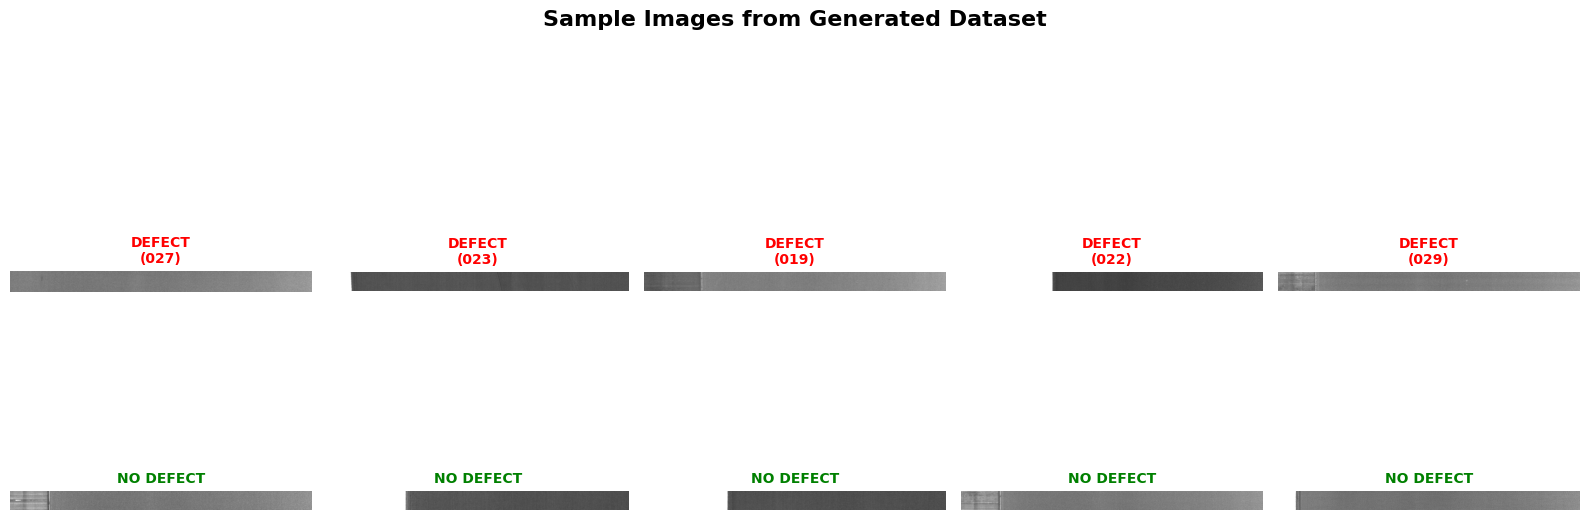

In [9]:
# Cell 4: Visualize Sample Images from Generated Dataset (FULLY FIXED)

import matplotlib.pyplot as plt
import cv2
import os
import random

def visualize_samples(dataset_path, num_samples=5):
    """Display sample images from the generated dataset"""

    # Get sample images
    defect_dir = os.path.join(dataset_path, 'train', 'defect')
    no_defect_dir = os.path.join(dataset_path, 'train', 'no_defect')

    # FIXED: Changed samples_per_class to num_samples
    defect_images = random.sample(os.listdir(defect_dir), num_samples)
    no_defect_images = random.sample(os. listdir(no_defect_dir), num_samples)

    # FIXED: Changed samples_per_class to num_samples
    fig, axes = plt.subplots(2, num_samples, figsize=(16, 7))

    # Display DEFECT images
    for i, img_name in enumerate(defect_images):
        img_path = os.path.join(defect_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[0, i].imshow(img)
        axes[0, i].set_title(f'DEFECT\n({img_name. split("_")[1]})',
                            color='red', fontweight='bold', fontsize=10)
        axes[0, i].axis('off')

    # Display NO_DEFECT images
    for i, img_name in enumerate(no_defect_images):
        img_path = os.path.join(no_defect_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[1, i].imshow(img)
        axes[1, i]. set_title('NO DEFECT',
                            color='green', fontweight='bold', fontsize=10)
        axes[1, i].axis('off')

    plt.suptitle('Sample Images from Generated Dataset',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('sample_images.png', dpi=150, bbox_inches='tight')
    plt.show()

# Display samples
visualize_samples('dataset', num_samples=5)

In [10]:
# Cell 5: Install Required Libraries

! pip install -q tensorflow==2.15.0
!pip install -q opencv-python-headless
!pip install -q matplotlib
! pip install -q scikit-learn
!pip install -q seaborn

print("✅ All libraries installed!")

# Verify TensorFlow and GPU
import tensorflow as tf
print(f"\nTensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15.0
✅ All libraries installed!

TensorFlow Version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
# Cell 6: Import All Required Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras. preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [15]:
# Cell 7: Model Configuration (UPDATED)

# Hyperparameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

# Paths
DATASET_PATH = 'dataset'
TRAIN_PATH = os.path.join(DATASET_PATH, 'train')
VAL_PATH = os.path. join(DATASET_PATH, 'validation')
TEST_PATH = os.path.join(DATASET_PATH, 'test')

# Model save path - FIXED:  Changed . h5 to .keras
MODEL_NAME = f'textile_defect_model_{datetime.now().strftime("%Y%m%d_%H%M%S")}'
BEST_MODEL_PATH = f'{MODEL_NAME}_best.keras'  # ✅ Changed from . h5
FINAL_MODEL_PATH = f'{MODEL_NAME}_final.keras'  # ✅ Changed from . h5

print("⚙️ Configuration:")
print(f"   Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"   Batch Size:  {BATCH_SIZE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Learning Rate: {LEARNING_RATE}")

⚙️ Configuration:
   Image Size: 224x224
   Batch Size:  32
   Epochs: 50
   Learning Rate: 0.001


In [16]:
# Cell 8: Data Generators with Augmentation

# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Validation and test data (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator = val_test_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Display info
print("📊 Dataset Information:")
print(f"   Classes: {train_generator.class_indices}")
print(f"   Training samples: {train_generator.samples}")
print(f"   Validation samples: {validation_generator.samples}")
print(f"   Test samples: {test_generator.samples}")

Found 172 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 39 images belonging to 2 classes.
📊 Dataset Information:
   Classes: {'defect': 0, 'no_defect': 1}
   Training samples: 172
   Validation samples: 36
   Test samples: 39


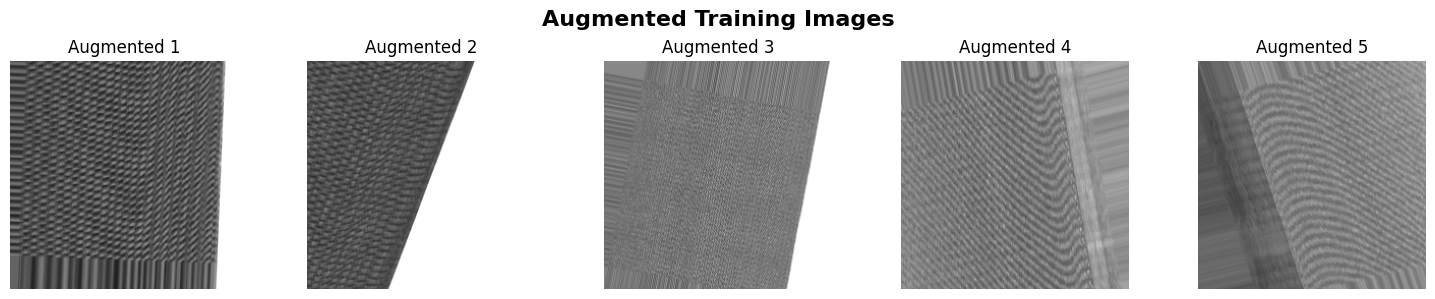

In [17]:
# Cell 9: Visualize Data Augmentation

def show_augmented_images(generator, num_images=5):
    """
    Display original and augmented versions of images
    """
    # Get a batch
    batch = next(generator)
    images = batch[0]

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(min(num_images, len(images))):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(f'Augmented {i+1}')

    plt.suptitle('Augmented Training Images', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('augmented_samples.png', dpi=150)
    plt.show()

show_augmented_images(train_generator, num_images=5)

In [18]:
# Cell 10: Build Transfer Learning Model (EfficientNetB0)

def create_model():
    """
    Create transfer learning model using EfficientNetB0
    """

    # Load pre-trained base model
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )

    # Freeze base model
    base_model.trainable = False

    # Build custom top layers
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(2, activation='softmax')  # 2 classes: defect, no_defect
    ])

    return model, base_model

# Create model
model, base_model = create_model()

# Display model summary
model.summary()

print(f"\n📈 Total Parameters: {model.count_params():,}")
print(f"   Trainable:  {sum([tf.size(w).numpy() for w in model.trainable_weights]):,}")
print(f"   Non-trainable: {sum([tf.size(w).numpy() for w in model.non_trainable_weights]):,}")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417,317 (16.85 MB)

 Trainable params: 364,418 (1.39 MB)

 Non-trainable params: 4,052,899 (15.46 MB)


📈 Total Parameters: 4,417,317
   Trainable:  364,418
   Non-trainable: 4,052,899


In [19]:
# Cell 11: Compile Model

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics. Precision(name='precision'),
        tf.keras.metrics. Recall(name='recall'),
        tf.keras.metrics. AUC(name='auc')
    ]
)

print("✅ Model compiled successfully!")

✅ Model compiled successfully!


In [20]:
# Cell 12: Setup Training Callbacks (FIXED)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

callbacks = [
    # Save best model - FIXED: Using .keras extension
    ModelCheckpoint(
        BEST_MODEL_PATH,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),

    # Early stopping
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate on plateau
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

print("✅ Callbacks configured!")
print(f"   Best model will be saved to: {BEST_MODEL_PATH}")
print(f"   Final model will be saved to: {FINAL_MODEL_PATH}")

✅ Callbacks configured!
   Best model will be saved to: textile_defect_model_20260117_141537_best.keras
   Final model will be saved to: textile_defect_model_20260117_141537_final.keras


In [21]:
# Cell 13: Train the Model (FIXED)

print("🚀 Starting training.. .\n")

# Train
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

# Save final model - FIXED: Using .keras extension
model.save(FINAL_MODEL_PATH)

print(f"\n✅ Training completed!")
print(f"   Best model saved:  {BEST_MODEL_PATH}")
print(f"   Final model saved: {FINAL_MODEL_PATH}")

🚀 Starting training.. .



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5100 - auc: 0.5309 - loss: 1.0362 - precision: 0.5100 - recall: 0.5100   
Epoch 1: val_accuracy improved from -inf to 0.58333, saving model to textile_defect_model_20260117_141537_best.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.5086 - auc: 0.5293 - loss: 1.0453 - precision: 0.5086 - recall: 0.5086 - val_accuracy: 0.5833 - val_auc: 0.6319 - val_loss: 0.6783 - val_precision: 0.5833 - val_recall: 0.5833 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.4358 - auc: 0.4206 - loss: 1.2493 - precision: 0.4358 - recall: 0.4358
Epoch 2: val_accuracy did not improve from 0.58333
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 701ms/step - accuracy: 0.4375 - auc: 0.4278 - loss: 1.2272 - precision: 0.4375 - recall: 0.4375 - val_accuracy: 0.5833 - val_auc: 0.6319 - val_loss: 0.6889 - val_precision: 0.5833 - val_recall: 0.5833 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accura

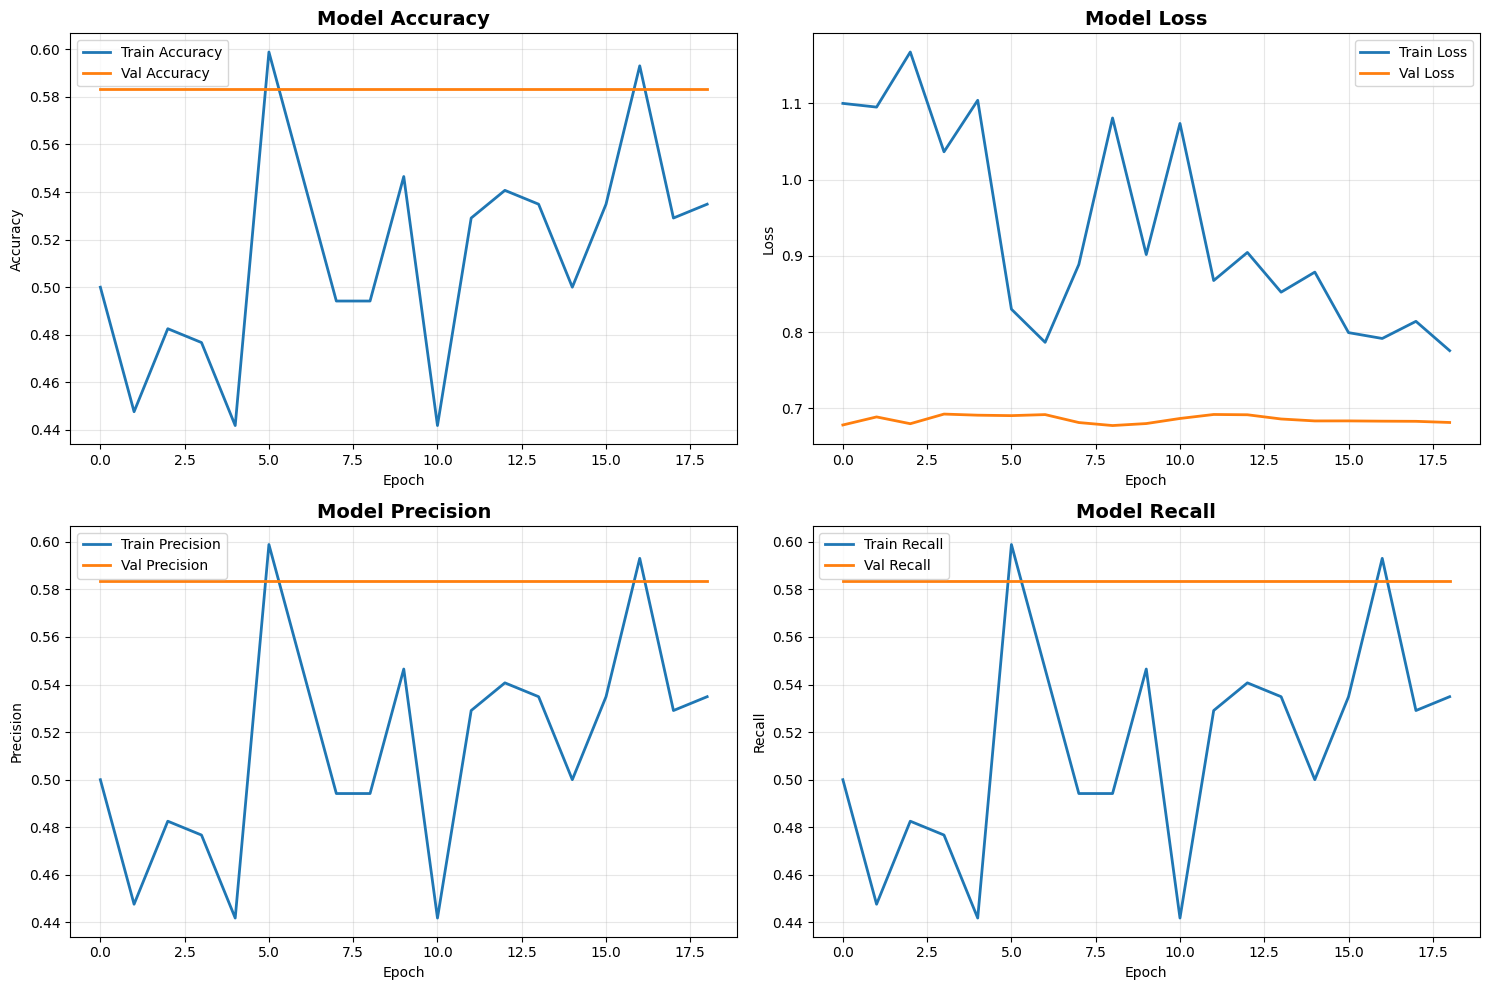

In [22]:
# Cell 14: Plot Training History

def plot_training_history(history):
    """
    Plot training and validation metrics
    """

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[0, 0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0, 1].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1]. legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train Precision', linewidth=2)
    axes[1, 0].plot(history.history['val_precision'], label='Val Precision', linewidth=2)
    axes[1, 0].set_title('Model Precision', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train Recall', linewidth=2)
    axes[1, 1].plot(history.history['val_recall'], label='Val Recall', linewidth=2)
    axes[1, 1].set_title('Model Recall', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_training_history(history)

In [23]:
# Cell 15: Evaluate Model on Test Data

print("📊 Evaluating model on test data.. .\n")

# Evaluate
test_results = model.evaluate(test_generator, verbose=1)

print("\n" + "="*50)
print("🎯 TEST SET RESULTS")
print("="*50)
print(f"Test Loss:       {test_results[0]:.4f}")
print(f"Test Accuracy:  {test_results[1]*100:.2f}%")
print(f"Test Precision:  {test_results[2]*100:.2f}%")
print(f"Test Recall:    {test_results[3]*100:.2f}%")
print(f"Test AUC:        {test_results[4]:.4f}")
print("="*50)

📊 Evaluating model on test data.. .

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 12s/step - accuracy: 0.5323 - auc: 0.5656 - loss: 0.6973 - precision: 0.5323 - recall: 0.5323

🎯 TEST SET RESULTS
Test Loss:       0.6860
Test Accuracy:  56.41%
Test Precision:  56.41%
Test Recall:    56.41%
Test AUC:        0.5950


2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step


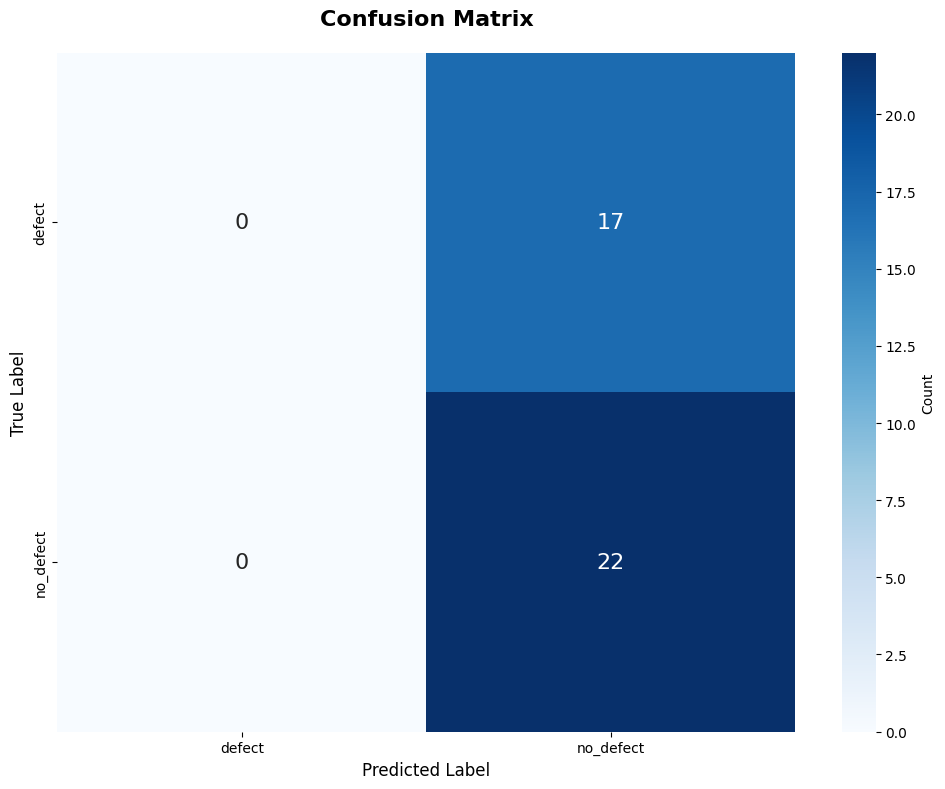


📋 CLASSIFICATION REPORT
              precision    recall  f1-score   support

      defect     0.0000    0.0000    0.0000        17
   no_defect     0.5641    1.0000    0.7213        22

    accuracy                         0.5641        39
   macro avg     0.2821    0.5000    0.3607        39
weighted avg     0.3182    0.5641    0.4069        39



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Cell 16: Generate Confusion Matrix and Classification Report

# Get predictions
test_generator.reset()
predictions = model. predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator. classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={'label': 'Count'}, annot_kws={'size': 16})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report
print("\n" + "="*60)
print("📋 CLASSIFICATION REPORT")
print("="*60)
print(classification_report(true_classes, predicted_classes,
                          target_names=class_labels, digits=4))
print("="*60)

In [25]:
# Cell 17: Create Prediction Function (VERIFIED)

def predict_image(image_path, model, display=True):
    """
    Predict if an image has defect or not

    Args:
        image_path:  Path to image file
        model: Trained model
        display: Whether to display results

    Returns:
        prediction:  'defect' or 'no_defect'
        confidence: Confidence score
    """

    # Load and preprocess image
    img = keras.preprocessing. image.load_img(
        image_path,
        target_size=(IMG_SIZE, IMG_SIZE)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_idx] * 100

    # Get class names
    class_names = ['defect', 'no_defect']
    prediction = class_names[predicted_class_idx]

    if display:
        # Create visualization
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Display image
        display_img = cv2.imread(image_path)
        display_img = cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB)
        axes[0].imshow(display_img)
        axes[0].set_title('Input Image', fontsize=14, fontweight='bold')
        axes[0].axis('off')

        # Display prediction
        colors = ['#ff6b6b' if predicted_class_idx == 0 else '#51cf66']
        bars = axes[1].bar(class_names, predictions[0], color=colors, alpha=0.8)
        axes[1].set_ylabel('Probability', fontsize=12)
        axes[1].set_title(f'Prediction: {prediction. upper()}\nConfidence: {confidence:.2f}%',
                         fontsize=14, fontweight='bold')
        axes[1].set_ylim([0, 1])
        axes[1].grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for bar in bars:
            height = bar. get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height*100:.1f}%',
                        ha='center', va='bottom', fontsize=11, fontweight='bold')

        plt.tight_layout()
        plt.savefig(f'prediction_{os.path.basename(image_path)}', dpi=150)
        plt.show()

    # Print results
    print(f"\n{'='*50}")
    print(f"🔍 PREDICTION RESULTS")
    print(f"{'='*50}")
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Prediction: {prediction.upper()}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"\nProbabilities:")
    print(f"  • Defect:      {predictions[0][0]*100:.2f}%")
    print(f"  • No Defect:   {predictions[0][1]*100:.2f}%")
    print(f"{'='*50}\n")

    return prediction, confidence

print("✅ Prediction function created!")

✅ Prediction function created!


Testing DEFECT image:


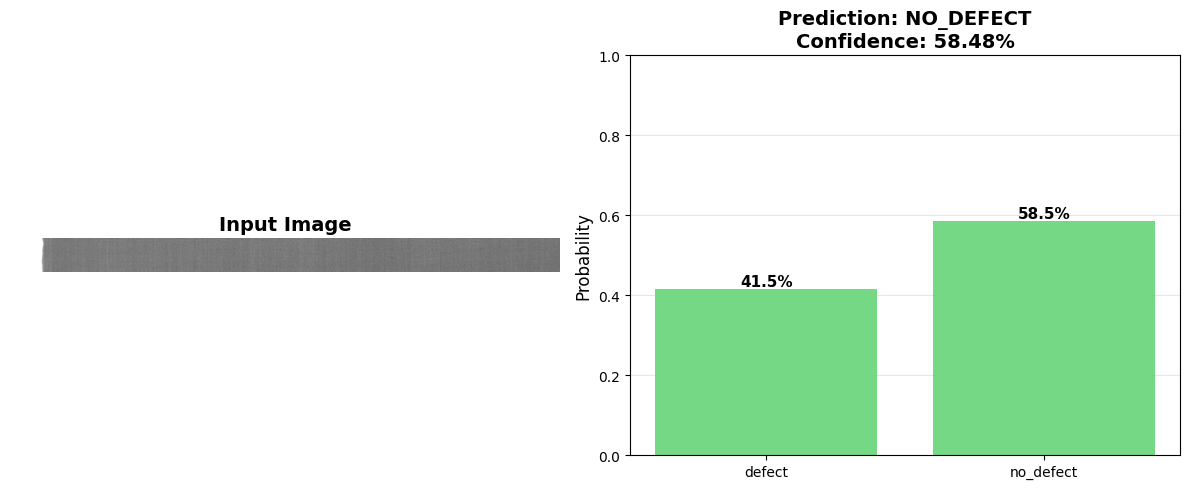


🔍 PREDICTION RESULTS
Image: 0035_019_02.png
Prediction: NO_DEFECT
Confidence: 58.48%

Probabilities:
  • Defect:      41.52%
  • No Defect:   58.48%


Testing NO DEFECT image:


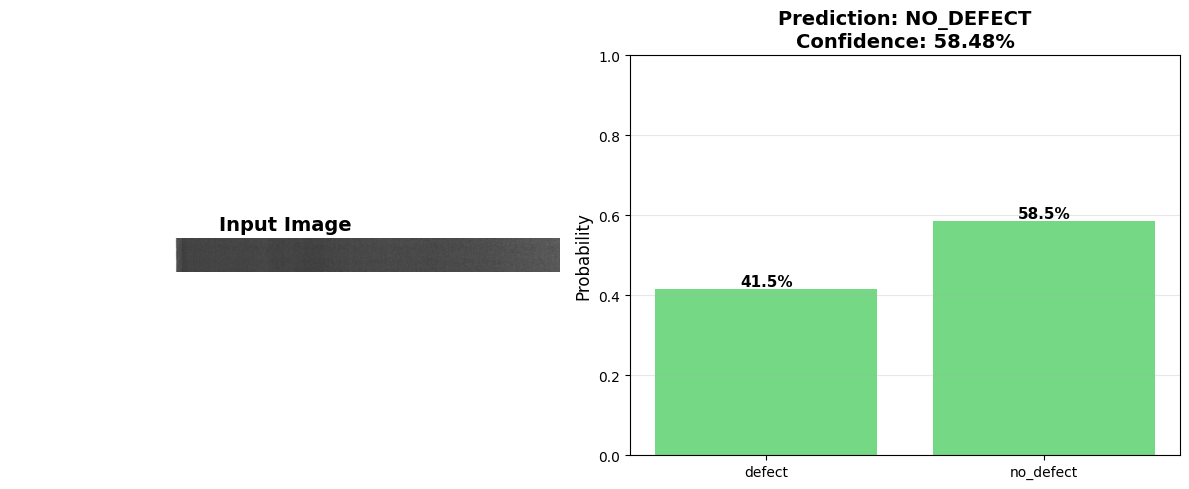


🔍 PREDICTION RESULTS
Image: 0010_000_00.png
Prediction: NO_DEFECT
Confidence: 58.48%

Probabilities:
  • Defect:      41.52%
  • No Defect:   58.48%



('no_defect', np.float32(58.475197))

In [26]:
# Cell 18: Test Predictions on Sample Images (FIXED)

import random

# Load the best model - FIXED: Using .keras extension
best_model = keras.models.load_model(BEST_MODEL_PATH)

# Test on random images from test set
# Get random defect image
defect_images = os.listdir('dataset/test/defect')
random_defect = random.choice(defect_images)
defect_path = os.path. join('dataset/test/defect', random_defect)

print("Testing DEFECT image:")
predict_image(defect_path, best_model)

# Get random no_defect image
no_defect_images = os. listdir('dataset/test/no_defect')
random_no_defect = random.choice(no_defect_images)
no_defect_path = os.path.join('dataset/test/no_defect', random_no_defect)

print("\nTesting NO DEFECT image:")
predict_image(no_defect_path, best_model)

In [27]:
# Cell 19: Predict Multiple Images (FIXED)

def predict_batch(folder_path, model, max_images=10):
    """
    Predict multiple images from a folder
    """

    results = []
    image_files = [f for f in os. listdir(folder_path)
                   if f.endswith(('.png', '.jpg', '.jpeg'))]

    print(f"\n🔍 Predicting {min(len(image_files), max_images)} images from {folder_path}\n")

    for i, img_name in enumerate(image_files[:max_images]):
        img_path = os.path.join(folder_path, img_name)

        # Load and preprocess
        img = keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = keras.preprocessing.image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        predictions = model.predict(img_array, verbose=0)
        predicted_class = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class] * 100

        class_names = ['defect', 'no_defect']
        result = class_names[predicted_class]

        results.append({
            'image':  img_name,
            'prediction': result,
            'confidence':  confidence
        })

        # Display result - FIXED:  Removed spaces in format specifiers
        status_icon = "❌" if result == 'defect' else "✅"
        print(f"{i+1}. {status_icon} {img_name:30s} → {result.upper():12s} ({confidence:.2f}%)")

    return results

# Test batch prediction
test_results = predict_batch('dataset/test/defect', best_model, max_images=5)


🔍 Predicting 5 images from dataset/test/defect

1. ✅ 0032_019_02.png                → NO_DEFECT    (58.48%)
2. ✅ 0085_030_02.png                → NO_DEFECT    (58.50%)
3. ✅ 0098_019_02.png                → NO_DEFECT    (58.46%)
4. ✅ 0058_019_06.png                → NO_DEFECT    (58.55%)
5. ✅ 0035_019_02.png                → NO_DEFECT    (58.48%)


📤 Upload an image to test...


Saving 0106_010_03.png to 0106_010_03.png

Testing uploaded image: 0106_010_03.png


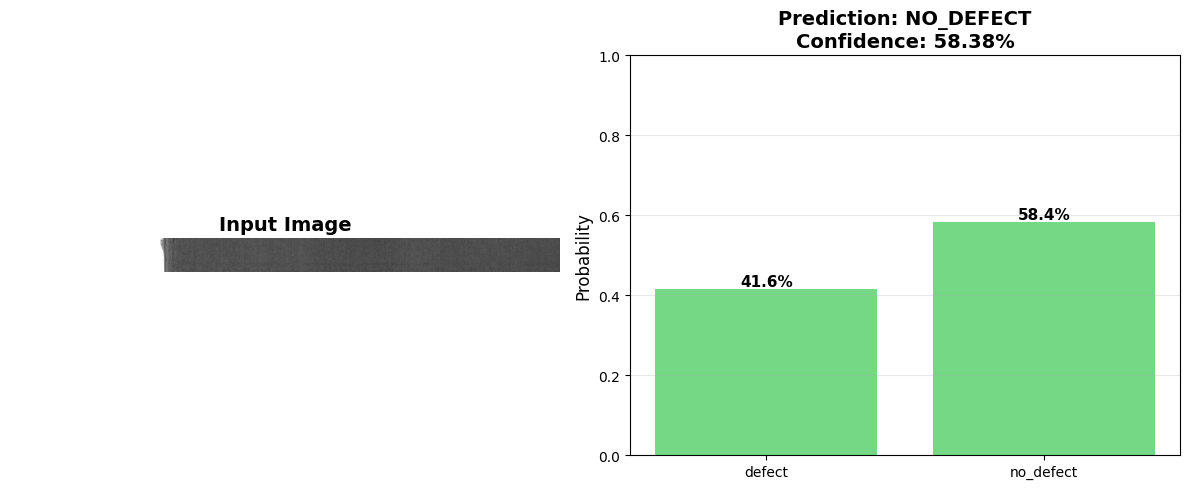


🔍 PREDICTION RESULTS
Image: 0106_010_03.png
Prediction: NO_DEFECT
Confidence: 58.38%

Probabilities:
  • Defect:      41.62%
  • No Defect:   58.38%



In [32]:
# Cell 20: Upload and Test Your Own Image

from google.colab import files

print("📤 Upload an image to test...")
uploaded = files.upload()

# Predict uploaded image
for filename in uploaded.keys():
    print(f"\nTesting uploaded image: {filename}")
    predict_image(filename, best_model)

In [29]:
# Cell 21: Download Trained Model to Your Computer (FIXED)

from google.colab import files

# Download best model
print("⬇️ Downloading best model...")
files.download(BEST_MODEL_PATH)

# Download final model
print("⬇️ Downloading final model...")
files.download(FINAL_MODEL_PATH)

# Download training history plot
if os.path.exists('training_history.png'):
    files.download('training_history.png')

# Download confusion matrix
if os.path.exists('confusion_matrix.png'):
    files.download('confusion_matrix.png')

print("✅ All files downloaded!")

⬇️ Downloading best model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading final model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All files downloaded!
